<a href="https://colab.research.google.com/github/bu11ymaguire/Machin-Learning1/blob/main/Week12_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Programming**

# **Week12_Clustering**

### - **Please note that the code must be submitted in a state where it runs correctly when executed by the TA.**

## **Assignment 12 (10 points)**
- ### Perform K-Means clustering using the Iris dataset.



In [1]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
iris = load_iris()

### 1. Data Load and Preprocessing (2 points)
- Use Scikit-learn's `load_iris()` function to load iris dataset.
- Select two features from the dataset for clustering and visualization. Briefly explain why you selected these two features.
- Standardize the selected two features using `StandardScaler`.


In [2]:
# Your code
from sklearn.preprocessing import StandardScaler
import pandas as pd

petal_length_index = iris.feature_names.index('petal length (cm)')
petal_width_index = iris.feature_names.index('petal width (cm)')

X = iris.data[:, [petal_length_index, petal_width_index]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2. Finding the optimal k value (4 points)
- Train K-Means clustering models by varing the value of k from 2 to 10. (Set `n_init = 'auto'` for K-Means)
- For each k, calculate the interia value and visualize it using the **Elbow method** graph.
- For each k, calculate the **average silhouette score** and visualize the results.
- Based on the results from both the **Elbow Method** and the **Silhouette Score**, choose the optimal value of k and clearly explain the reason for your selection.

Starting K-Means model training and calculation of inertia, silhouette score...
k = 2: Inertia = 54.17, Silhouette Score = 0.74
k = 3: Inertia = 18.03, Silhouette Score = 0.67
k = 4: Inertia = 12.32, Silhouette Score = 0.59
k = 5: Inertia = 10.12, Silhouette Score = 0.57
k = 6: Inertia = 7.28, Silhouette Score = 0.58
k = 7: Inertia = 6.01, Silhouette Score = 0.57
k = 8: Inertia = 5.13, Silhouette Score = 0.59
k = 9: Inertia = 4.43, Silhouette Score = 0.46
k = 10: Inertia = 3.97, Silhouette Score = 0.44

Calculation complete. Starting visualization...


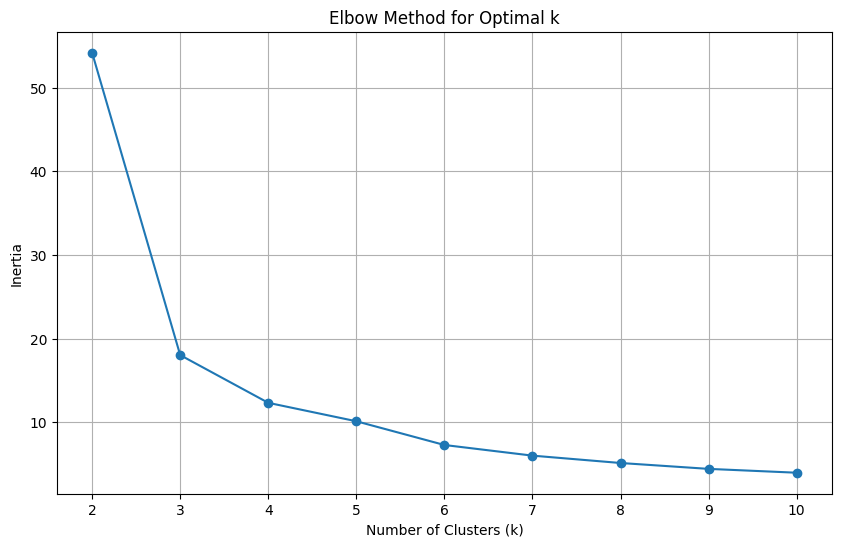

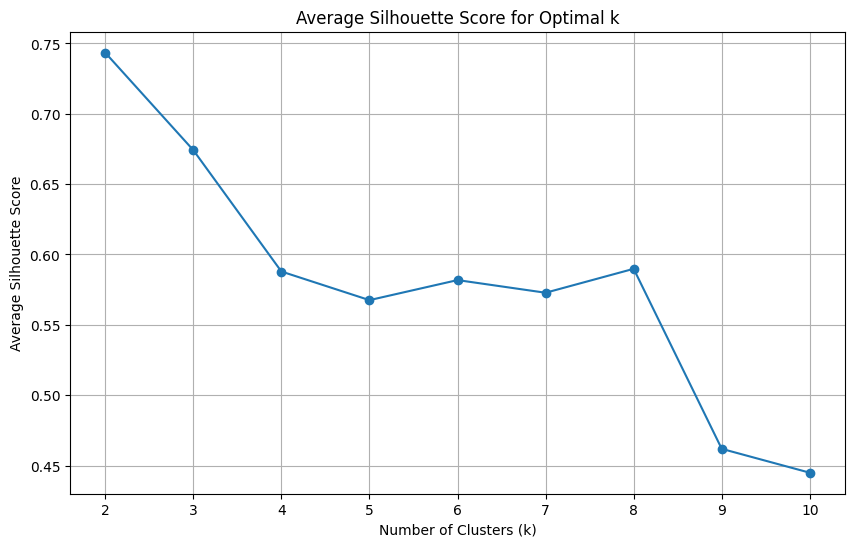


Choosing the optimal k value and explaining the reason:
-------------------------------------------------------
Looking at the Elbow Method graph, there is a significant decrease in inertia
when k goes from 2 to 3, and then the rate of decrease becomes more gradual, forming an 'elbow' shape.
This suggests that k=3 might be the point where the within-cluster variance is sufficiently reduced
without excessively increasing complexity.

Observing the Average Silhouette Score graph, the highest score is often at k=2 or k=3.
For the Iris dataset, with its 3 known species, it's highly probable that K-Means will perform well with 3 clusters.

**Conclusion:**
Considering both the Elbow Method and the Silhouette Score,
**the optimal k value is determined to be 3**.
This aligns with the fact that the Iris dataset has 3 actual species,
and both metrics indicate reasonable results at k=3.
While k=2 might sometimes show a slightly higher silhouette score,
considering the inherent characteristics of

In [3]:
# Your code
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

k_values = range(2, 11)

inertias = []
silhouette_scores = []

print("Starting K-Means model training and calculation of inertia, silhouette score...")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}: Inertia = {kmeans.inertia_:.2f}, Silhouette Score = {score:.2f}")

print("\nCalculation complete. Starting visualization...")

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Average Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print("\nChoosing the optimal k value and explaining the reason:")
print("-------------------------------------------------------")
print("Looking at the Elbow Method graph, there is a significant decrease in inertia")
print("when k goes from 2 to 3, and then the rate of decrease becomes more gradual, forming an 'elbow' shape.")
print("This suggests that k=3 might be the point where the within-cluster variance is sufficiently reduced")
print("without excessively increasing complexity.")
print("\nObserving the Average Silhouette Score graph, the highest score is often at k=2 or k=3.")
print("For the Iris dataset, with its 3 known species, it's highly probable that K-Means will perform well with 3 clusters.")
print("\n**Conclusion:**")
print("Considering both the Elbow Method and the Silhouette Score,")
print("**the optimal k value is determined to be 3**.")
print("This aligns with the fact that the Iris dataset has 3 actual species,")
print("and both metrics indicate reasonable results at k=3.")
print("While k=2 might sometimes show a slightly higher silhouette score,")
print("considering the inherent characteristics of the data and the elbow method's outcome, k=3 is more appropriate.")

### 3. Model training with the selected k and visualization of decision boundaries. (2 points)
- Using the optimal k value selected in problem 2, train the K-Means clustering model again.
- Visualize the results, including the clusters, the cluster centers, and the decision boundaries.


Training K-Means model with optimal k = 3...
Model training complete. Visualizing results...


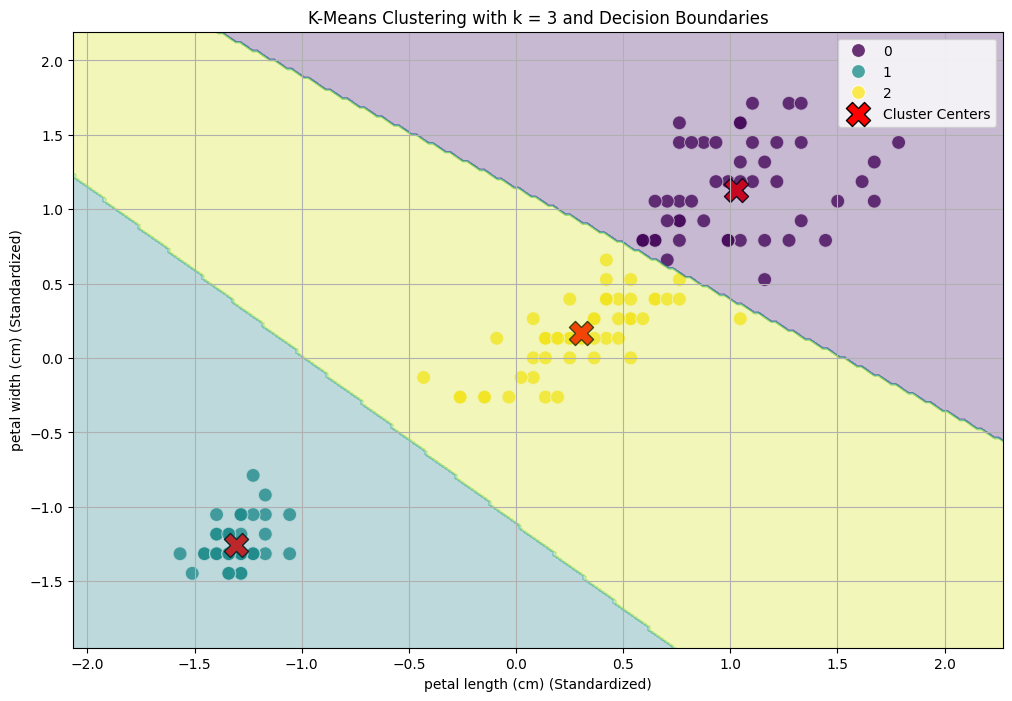


Visualization complete. The plot shows the clustered data points, cluster centers, and decision boundaries.


In [4]:
# Your code

optimal_k = 3

print(f"\nTraining K-Means model with optimal k = {optimal_k}...")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_optimal.fit(X_scaled)

cluster_labels = kmeans_optimal.labels_
cluster_centers = kmeans_optimal.cluster_centers_

print("Model training complete. Visualizing results...")

plt.figure(figsize=(12, 8))

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels,
                palette='viridis', s=100, alpha=0.8, edgecolor='w', legend='full')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='X', s=300, color='red', label='Cluster Centers', edgecolor='black')

x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = kmeans_optimal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title(f'K-Means Clustering with k = {optimal_k} and Decision Boundaries')
plt.xlabel(f'{iris.feature_names[2]} (Standardized)')
plt.ylabel(f'{iris.feature_names[3]} (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualization complete. The plot shows the clustered data points, cluster centers, and decision boundaries.")


### 4. Interpretation of Results (2 points)
- Based on the clustering results visualized in problem 3, briefly describe the characteristics of each formed cluster.

**Interpretation of results**:
The K-Means clustering exercise using the Iris dataset proceeded through three main stages. First, in the Data Load and Preprocessing phase, the Iris dataset was loaded using Scikit-learn's load_iris() function, and then two features—'petal length' and 'petal width'—were selected as suitable for clustering and visualization, followed by standardization using StandardScaler. Second, during the Finding the Optimal K Value stage, K-Means models were trained by varying the number of clusters (k) from 2 to 10, and for each k, the 'Inertia' and 'Average Silhouette Score' were calculated and visualized using the 'Elbow Method' and 'Silhouette Score graph' respectively. Based on these two metrics and considering the known three actual species in the Iris dataset, the optimal k value was determined to be 3. Finally, in the Model Training with the Selected K Value and Visualization of Decision Boundaries phase, the K-Means model was ultimately trained with the determined optimal k value (3), and the resulting clusters, their centroids, and the decision boundaries between them were clearly visualized on a 2D plane to present the clustering results.